## EDA on the fraud detection dataset

In [77]:
import numpy as np
import pandas as pd
import zipfile

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Read the data
#### Files
* train_{transaction, identity}.csv - the training set
* test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
* sample_submission.csv - a sample submission file in the correct format

In [5]:
file_name = 'ieee-fraud-detection.zip'
data_path = '../data/' + file_name 

In [11]:
# read zip file
zf = zipfile.ZipFile(data_path)
# training data including identity and transaction
train_identity = pd.read_csv(zf.open('train_identity.csv'))
train_transaction = pd.read_csv(zf.open('train_transaction.csv'))
# test data including identity and transaction
test_identity = pd.read_csv(zf.open('test_identity.csv'))
test_transaction = pd.read_csv(zf.open('test_transaction.csv'))

In [13]:
print('The shape of the train identity data:', train_identity.shape)
print('The shape of the train transaction data:', train_transaction.shape)
print('The shape of the test identity data:', test_identity.shape)
print('The shape of the test transaction data:', test_transaction.shape)

The shape of the train identity data: (144233, 41)
The shape of the train transaction data: (590540, 394)
The shape of the test identity data: (141907, 41)
The shape of the test transaction data: (506691, 393)


In [16]:
train_identity.head(5)

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09              ...                              id_31  id_32  \
0    NaN              ...                samsung browser 6.2   32.0   
1    NaN              ...                 mobile safari 11.0   32.0   
2    0.0              ...                        chrome 62.0    NaN   
3    NaN              ...                        chrome 62.0    NaN   
4    0.0              ...                        chrome 62.0   24.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0  2220x1080  match_status:2      T     F     T      T      mobile   
1   1334x750  match_status:1      T     F     F      T      mobile   
2        NaN             NaN      F     F     T      T     desktop   
3        NaN             NaN      F     F     T      T     desktop   
4   1280x800  match_status:2      T     F     T      T     desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS  

[5 rows x 41 columns]

In [17]:
train_transaction.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...  V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...   0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

## High-level info about the data
The data is broken into two files identity and transaction, which are joined by **TransactionID**. Not all transactions have corresponding identity information.
### 1. Identity Data
* TransactionID (Unique)
#### 1.1 Categorial Features
* DeviceType
* DeviceInfo
* id_12 - id_38
#### 1.2 Numerial Data
* id_0 - id_11

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

### 2. Transaction Data

* TransactionID (Unique)

#### 1.1 Categorial Features
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

#### 1.2 Numerial Data

### Merge the data by TransactionID

In [111]:
df_train = pd.merge(train_identity, train_transaction, on = 'TransactionID')

## Missing value in the data

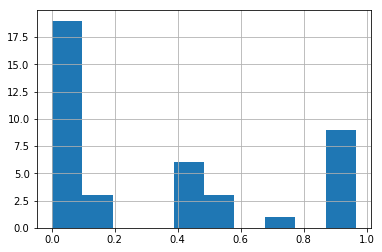

In [40]:
null_identity = train_identity.isnull().sum() / train_identity.shape[0]
null_identity.hist()

In [67]:
len(list(null_identity[null_identity > 0.9].index))

9

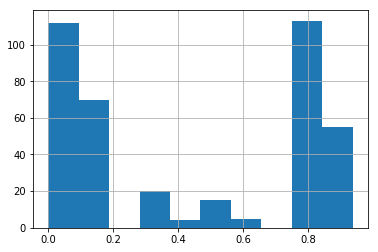

In [36]:
null_transaction = train_transaction.isnull().sum() / train_transaction.shape[0]
null_transaction.hist()

In [66]:
len(list(null_transaction[null_transaction > 0.7].index))

168

#### Label Distribution

In [110]:
pect_fraud = sum(train_transaction['isFraud'] == 1) / train_transaction['isFraud'].shape[0] * 100
print('The percentage of the fraud transactions in the training dataset: %.2f%%' %pect_fraud)

The percentage of the fraud transactions in the training dataset: 3.50%


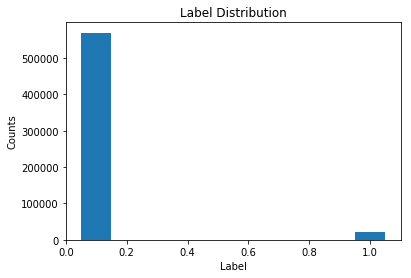

In [150]:
plt.hist(train_transaction['isFraud'], histtype='bar', align='right')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

### TransactionDT

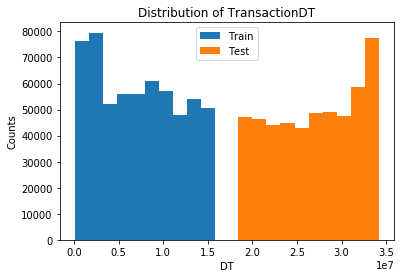

In [122]:
#plt.figure(figsize=(8,6))
plt.hist(train_transaction['TransactionDT'], label='Train')
plt.hist(test_transaction['TransactionDT'], label='Test')
plt.xlabel('DT')
plt.ylabel('Counts')
plt.title('Distribution of TransactionDT')
plt.legend()
plt.show()

### TransactionAmt

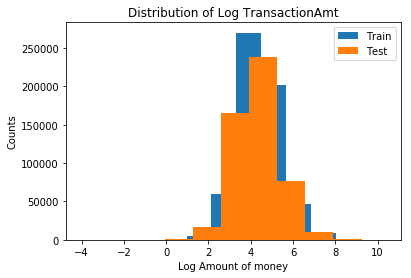

In [129]:
plt.hist(np.log(train_transaction['TransactionAmt']), label='Train')
plt.hist(np.log(test_transaction['TransactionAmt']), label='Test')
plt.xlabel('Log Amount of money')
plt.ylabel('Counts')
plt.title('Distribution of Log TransactionAmt')
plt.legend()
plt.show()

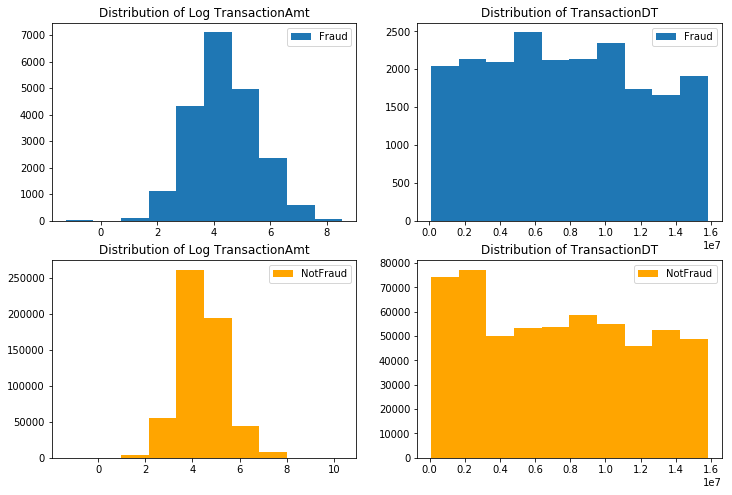

In [168]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(np.log(train_transaction[train_transaction['isFraud'] == 1].TransactionAmt), label='Fraud')
plt.title('Distribution of Log TransactionAmt')
plt.legend()
plt.subplot(2,2,3)
plt.hist(np.log(train_transaction[train_transaction['isFraud'] == 0].TransactionAmt), label='NotFraud', color='orange')
plt.title('Distribution of Log TransactionAmt')
plt.legend()
plt.subplot(2,2,2)
plt.hist(train_transaction[train_transaction['isFraud'] == 1].TransactionDT, label='Fraud')
plt.title('Distribution of TransactionDT')
plt.legend()
plt.subplot(2,2,4)
plt.hist(train_transaction[train_transaction['isFraud'] == 0].TransactionDT, label='NotFraud', color='orange')
plt.title('Distribution of TransactionDT')
plt.legend()
plt.show()

#### Key insights of the data
* The number of samples in identity and transactions is **NOT** equal, while all the examples in identiy also in transactions. So, you can merge them.
* Train and test are distibuted during different time period.